<a href="https://colab.research.google.com/github/damilola2010/Data_Visualization_IBM_Final_Project/blob/master/Data_Visualization_Project_IBM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Question 1

A survey was conducted to gauge an audience interest in different data science topics, namely:


Big Data (Spark / Hadoop),
Data Analysis / Statistics,
Data Journalism,
Data Visualization,
Deep Learning,
Machine Learning,

The participants had three options for each topic: Very Interested, Somewhat interested, and Not interested. 2,233 respondents completed the survey.

In [1]:
import numpy as np  # useful for many scientific computing in Python
import pandas as pd # primary data structure library

## Task 1: Read the data

In [2]:
from google.colab import files
uploaded = files.upload()

Saving Topic_Survey_Assignment.csv to Topic_Survey_Assignment.csv


In [9]:
df_project = pd.read_csv('Topic_Survey_Assignment.csv', index_col=0 )
df_project.head()

Very interested  ...  Not interested
Big Data (Spark / Hadoop)              1332  ...             127
Data Analysis / Statistics             1688  ...              60
Data Journalism                         429  ...             610
Data Visualization                     1340  ...             102
Deep Learning                          1263  ...             136

[5 rows x 3 columns]

## Task 2: Bar Chart

In [10]:
#import matplotlib

%matplotlib inline 

import matplotlib as mpl
import matplotlib.pyplot as plt
print ('Matplotlib version: ', mpl.__version__)

Matplotlib version:  3.2.2


In [11]:
#Sort the data
df_project.sort_values(['Very interested'], ascending=False, axis=0, inplace=True)


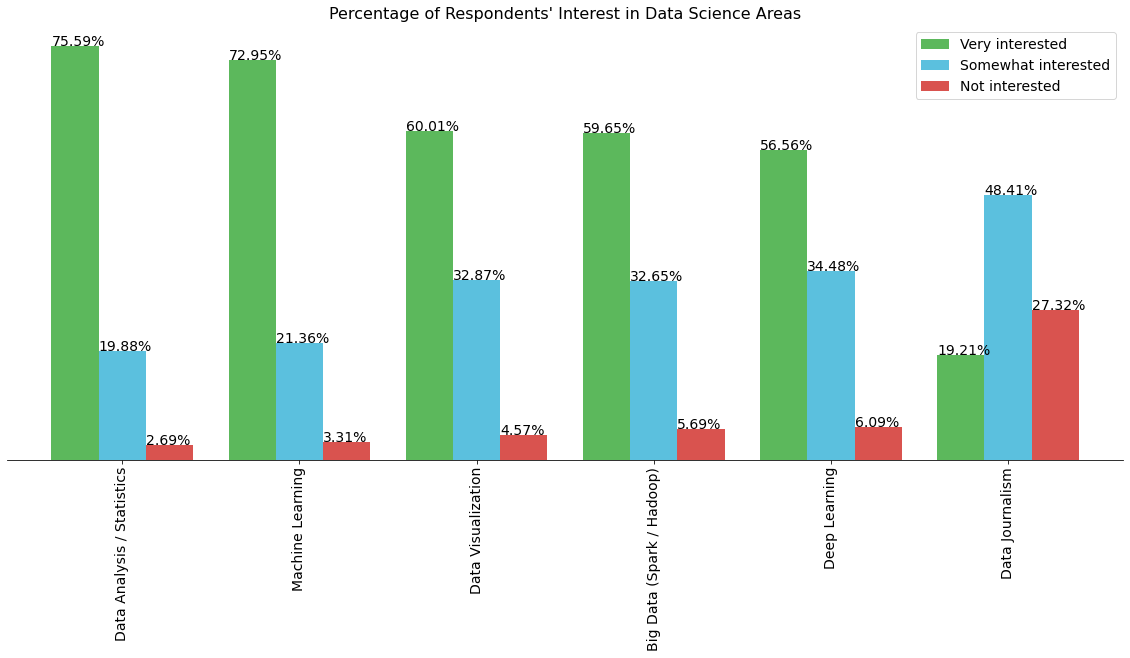

In [14]:
#Plot
ax = df_project.plot(kind='bar', figsize=(20, 8), width=0.8, color=['#5cb85c', '#5bc0de', '#d9534f'], fontsize=14)
ax.set_title("Percentage of Respondents' Interest in Data Science Areas", size=16) 
ax.spines['left'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.yaxis.set_major_locator(plt.NullLocator())
for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy()
    ax.annotate('{:.2%}'.format(height/2233), (x, y + height + 0.01), size=14)
ax.legend(fontsize=14)

plt.show()

## Task 3: Choropleth Map

In [15]:
# Read the csv file and convert to dataframe
df_incidents = pd.read_csv('https://cocl.us/sanfran_crime_dataset')

print('Dataset downloaded and read into a pandas dataframe!')

Dataset downloaded and read into a pandas dataframe!


## Cleanup the data

In [16]:
df_incidents.head()

IncidntNum  ...            PdId
0   120058272  ...  12005827212120
1   120058272  ...  12005827212168
2   141059263  ...  14105926363010
3   160013662  ...  16001366271000
4   160002740  ...  16000274071000

[5 rows x 13 columns]

In [17]:
df_incidents.groupby(['PdDistrict']).groups.keys()

dict_keys(['BAYVIEW', 'CENTRAL', 'INGLESIDE', 'MISSION', 'NORTHERN', 'PARK', 'RICHMOND', 'SOUTHERN', 'TARAVAL', 'TENDERLOIN'])

In [19]:
df_crime_nh = df_incidents.groupby('PdDistrict')['PdId'].count().reset_index()
df_crime_nh.head()

PdDistrict   PdId
0    BAYVIEW  14303
1    CENTRAL  17666
2  INGLESIDE  11594
3    MISSION  19503
4   NORTHERN  20100

In [20]:
df_crime_nh.rename(columns={'PdDistrict':'Neighborhood', 'PdId':'Count'}, inplace=True)

df_crime_nh.head()

Neighborhood  Count
0      BAYVIEW  14303
1      CENTRAL  17666
2    INGLESIDE  11594
3      MISSION  19503
4     NORTHERN  20100

### I am using googlecolab, so install folium on google colab

In [32]:
!pip install earthengine-api
!pip install folium

print('Folium installed and imported!')

Folium installed and imported!


In [40]:
import folium

In [41]:
# download the geojson file
!wget --quiet https://cocl.us/sanfran_geojson -O sanfran_geo.json
    
print('GeoJSON file downloaded!')

GeoJSON file downloaded!


In [42]:

sf_geo = r'sanfran_geo.json' # geojson file

In [43]:
# San Francisco latitude and longitude values
latitude = 37.77
longitude = -122.42

In [44]:
# create a plain world map
sanfran_map = folium.Map(location=[latitude, longitude], zoom_start=12)

In [45]:
# generate choropleth map
sanfran_map.choropleth(
    geo_data=sf_geo,
    data=df_crime_nh,
    columns=['Neighborhood', 'Count'],
    key_on='feature.properties.DISTRICT',
    fill_color='YlOrRd', 
    fill_opacity=0.7, 
    line_opacity=0.2,
    legend_name='Crime Rate in San Fransisco'
)

# display map
sanfran_map

/usr/local/lib/python3.6/dist-packages/folium/folium.py:426: FutureWarning: The choropleth  method has been deprecated. Instead use the new Choropleth class, which has the same arguments. See the example notebook 'GeoJSON_and_choropleth' for how to do this.
  FutureWarning
